차원 축소(특성의 개수를 줄임)

2차원 배열 이상인 경우 -> 축 = 차원

1차원 = 벡터 ->차원 = 원소의 개수

배열 = 텐서

PCA 클래스 (주성분) : 2개의 특성->1개의 주성분 = 차원축소

훈련데이터가 퍼져있는 경우 가장 많이 퍼져있는 쪽을 찾는것

원점에서 시작하는 벡터를 찾는다

In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-07-26 14:05:13--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-07-26 14:05:13--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-07-26 14:05:13--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')#데이터불러오기
fruits_2d = fruits.reshape(-1, 100*100)#1X10000

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)#10000개의 특성에서 주성분 50개 찾는다
pca.fit(fruits_2d)#타깃X

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_.shape)#components속성에 들어감
#주성분은 50개 주성분당 특성은 10000개

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)# n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:# n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

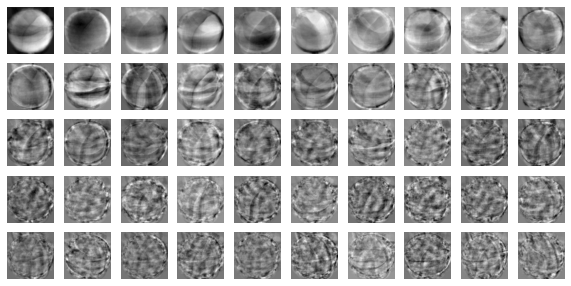

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
#주성분 50개

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
#원본데이터의 차원을 50으로 줄임

In [9]:
print(fruits_pca.shape)

(300, 50)


원본 데이터 재구성(복원) ->완벽하게 되지는 않음(손실이 발생했기 때문에)

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)#원본데이터 재구성
print(fruits_inverse.shape)#300X50 -> 300X10000

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

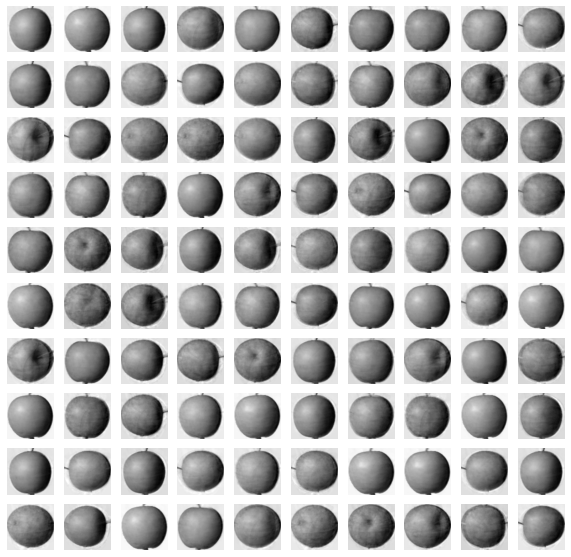

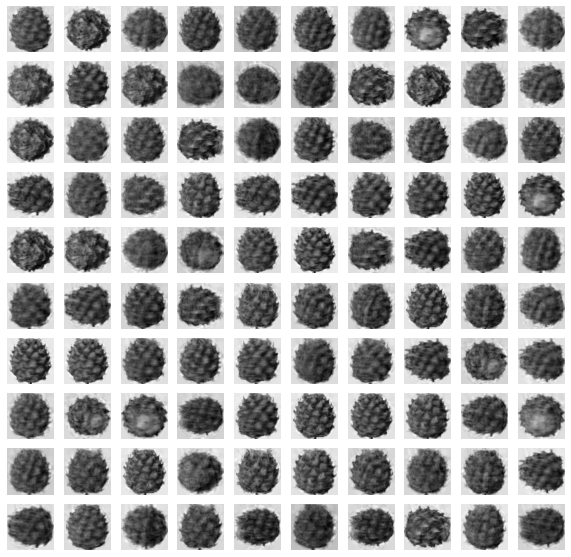

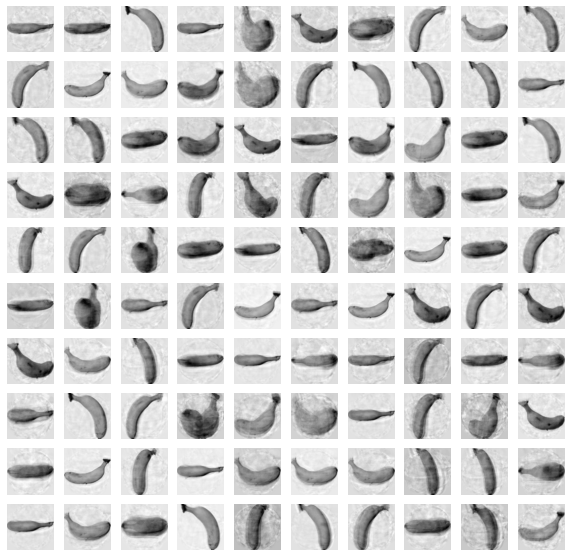

In [12]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")
#어느정도 복원을 잘 됨

설명된 분산

In [13]:
print(np.sum(pca.explained_variance_ratio_))
#각각의 주성분 50개의 분산을 모두 더함
#1/200으로 줄였음에도 불구하고 높은 복원성능을 자랑함
#92%정도 복원

0.9214204430354991


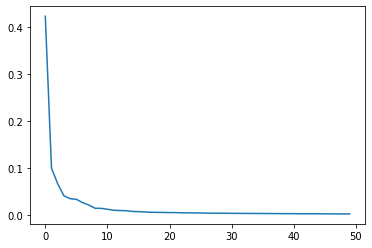

In [14]:
plt.plot(pca.explained_variance_ratio_)
#알맞은 수의 주성분 찾기
#한 10개 정도는 훈련데이터를 잘표현 하고 그이상은 별로..

다른 알고리즘과 함께 사용하기

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [16]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)#타깃데이터 만들기

In [17]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))#정확도
print(np.mean(scores['fit_time']))#훈련시간

0.9966666666666667
0.9390402793884277


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))#정확도
print(np.mean(scores['fit_time']))#훈련시간

1.0
0.03631467819213867


10000개의 차원을 사용할때랑 50개의 차원만을 사용할 경우 훈련시간에서의 차이가 상당하다 뿐만 아니라 교차검증의 점수는 비슷하다!

In [19]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
#설명된 분산의 비율
#원본데이터의 50%정도만 설명할수 있는 주성분의 개수를 찾아줘

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.n_components_)
#2개 로 50% 설명 가능

2


In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))#특성 2개인데 교차검증 점수 높다..<분류기일 경우 충분히 좋음>
print(np.mean(scores['fit_time']))

0.99
0.050687742233276364


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


군집과 함께 사용하기

In [23]:
from sklearn.cluster import KMeans
#k 평균 알고리즘으로 클러스트 찾기
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [24]:
print(np.unique(km.labels_, return_counts=True))
#각각의 인덱스 값과 그 개수

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


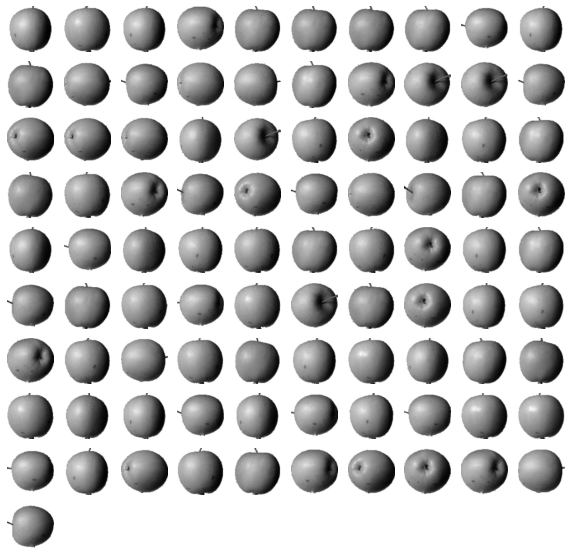

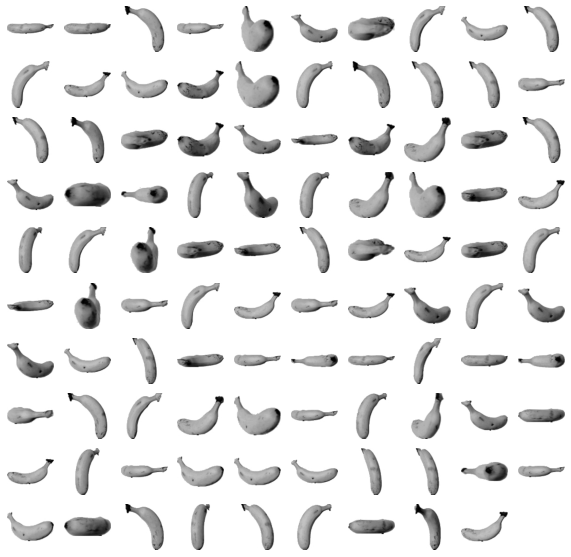

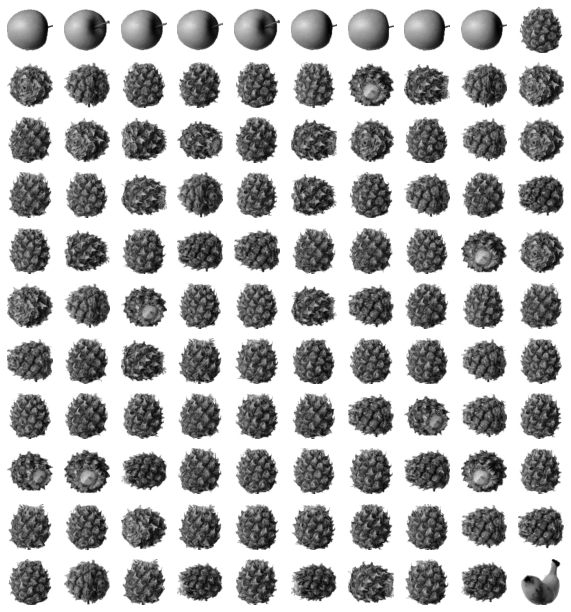

In [25]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

시각화

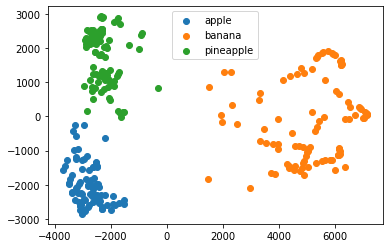

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    #fruits_pca(2차원배열) -> 산점도
    #km.labels_ -> 클러스터 별로 나눈후 산점도
    plt.scatter(data[:,0], data[:,1])#x축이 범위가 큰걸로 보아서 중요도가 큰 듯.
plt.legend(['apple', 'banana', 'pineapple'])#각주
plt.show()

#사과와 파인애플이 몇개가 애매하게 섞임
#로지스틱 회귀가 잘 분류함
#차원 축소 -> 시각화
#주성분 2개 특성